In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
housing = fetch_california_housing()
X = housing.data          # shape (20640, 8)
y = housing.target        # shape (20640,)


In [9]:
print(f"Dataset shape: X={X.shape}, y={y.shape}")

Dataset shape: X=(20640, 8), y=(20640,)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [12]:
w = np.zeros(X_b.shape[1])

In [13]:
learning_rate = 0.01
epochs = 1000
n = X_b.shape[0]

In [14]:
cost_history = []

In [15]:
for epoch in range(epochs):
    predictions = X_b.dot(w)                  # Predictions: (20640,)
    errors = predictions - y                  # Errors: (20640,)
    cost = (1/n) * np.sum(errors ** 2)       # Mean Squared Error
    cost_history.append(cost)

    gradients = (2/n) * X_b.T.dot(errors)    # Gradient vector: (9,)
    w = w - learning_rate * gradients        # Update weights

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

Epoch 0, Cost: 5.6105
Epoch 100, Cost: 0.7114
Epoch 200, Cost: 0.5981
Epoch 300, Cost: 0.5772
Epoch 400, Cost: 0.5632
Epoch 500, Cost: 0.5530
Epoch 600, Cost: 0.5456
Epoch 700, Cost: 0.5401
Epoch 800, Cost: 0.5361
Epoch 900, Cost: 0.5331


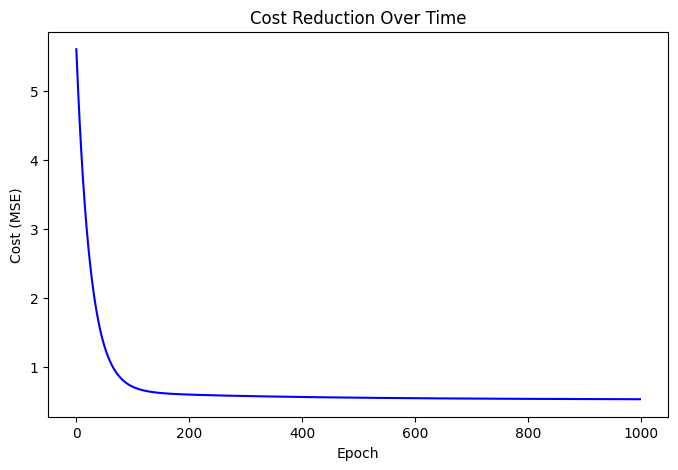

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(epochs), cost_history, 'b-')
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Time")
plt.show()


In [17]:
print("Learned weights (including bias):")
print(w)

Learned weights (including bias):
[ 2.06855817  0.83900939  0.14736038 -0.23305152  0.25675775  0.00578233
 -0.04194651 -0.68251625 -0.65183517]


In [18]:
y_pred = X_b.dot(w)

In [23]:

mse_custom = np.mean((y_pred - y) ** 2)
rmse_custom = np.sqrt(mse_custom)
r2_custom = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

print(f"\nCustom Linear Regression Performance:")
print(f"MSE: {mse_custom:.4f}")
print(f"RMSE: {rmse_custom:.4f}")
print(f"R^2 Score: {r2_custom:.4f}")



Custom Linear Regression Performance:
MSE: 0.5309
RMSE: 0.7286
R^2 Score: 0.6013


In [24]:


sklearn_model = LinearRegression()
sklearn_model.fit(X_scaled, y)
y_pred_sklearn = sklearn_model.predict(X_scaled)

mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

print(f"\nSklearn Linear Regression Performance:")
print(f"MSE: {mse_sklearn:.4f}")
print(f"RMSE: {rmse_sklearn:.4f}")
print(f"R^2 Score: {r2_sklearn:.4f}")




Sklearn Linear Regression Performance:
MSE: 0.5243
RMSE: 0.7241
R^2 Score: 0.6062


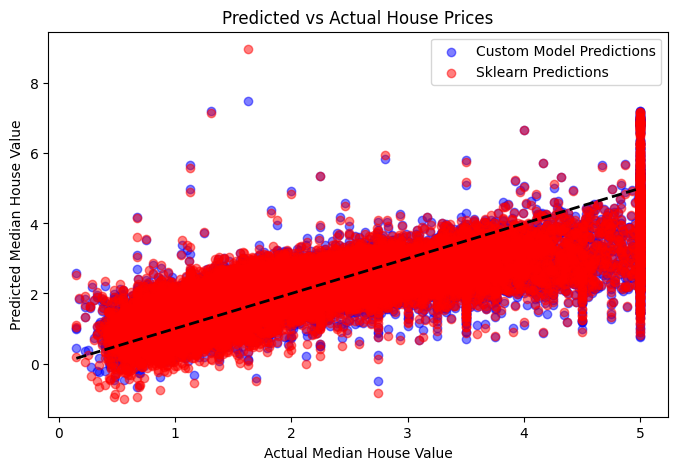

In [22]:

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, c='blue', label='Custom Model Predictions', alpha=0.5)
plt.scatter(y, y_pred_sklearn, c='red', alpha=0.5, label='Sklearn Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.show()